## Задание 1

In [79]:
from pulp import *
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

In [139]:
C = np.array([list(map(int, input(f'Введите {i+1} строку матрицы C (числа через пробел):\n').split())) for i in range(3)])
print('\nМатрица C:')
print(C)


Матрица C:
[[16 18  9  1]
 [13 16 18  9]
 [14 23 12  7]]


In [140]:
a1, a2, a3 = map(int, input('Введите через пробел числа a1, a2, a3:\n').split())
a1,a2,a3

(70, 50, 240)

In [141]:
A = np.array([a1, a2, a3])

In [138]:
b1, b2, b3, b4 = map(int, input('Введите через пробел числа b1, b2, b3, b4:\n').split())

In [142]:
B = np.array([b1, b2, b3, b4])
B

array([100,  10,  70, 160])

In [7]:
N = len(A)
M = len(B)

In [143]:
df = pd.DataFrame(C, columns=B, index=A)
df.columns.name = 'aᵢ \\ bⱼ'
df

aᵢ \ bⱼ,100,10,70,160
70,16,18,9,1
50,13,16,18,9
240,14,23,12,7


In [144]:
if sum(A) == sum(B):
    print('Задача закрытого типа')
else:
    print('Задача открытого типа')
    print('sum A = ',sum(A))
    print('sum B = ', sum(B))

Задача открытого типа
sum A =  360
sum B =  340


In [146]:
df[20] = 0

In [152]:
C = df.values
B = df.columns.values

In [153]:

if sum(df.columns) == sum(df.index):
    print('Задача закрытого типа')
else:
    print('Задача открытого типа')
    print(sum(df.columns))
    print(sum(df.index))

Задача закрытого типа


In [155]:
P = np.zeros_like(C)
INF = 1_000_000_000
C_ = C.copy()
A_ = A.copy()
B_ = B.copy()

i = 0
j = 0
while not np.all(C_ == INF):
    i, j = np.unravel_index(C_.argmin(), C_.shape)
    P[i][j] = min(A_[i], B_[j])
    if A_[i] <= B_[j]:
        C_[i].fill(INF)
        B_[j] -= A_[i]
        A_[i] = 0
    else:
        C_[:, j].fill(INF)
        A_[i] -= B[j]
        B_[j] = 0
if np.count_nonzero(P) == N + M - 1:
    print('Опорный план является невырожденным')
else:
    print('Опорный план является вырожденным')

F = 0
for i in range(N):
    for j in range(M):
        F += C[i][j] * P[i][j]
print('Полученный план перевозки груза:\n', P)
print('Значение целевой функции для этого опорного плана F =', F)


Опорный план является невырожденным
Полученный план перевозки груза:
 [[  0   0   0  50  20]
 [ 50   0   0   0   0]
 [ 10   0  70 110   0]]
Значение целевой функции для этого опорного плана F = 2450


## Задание 2

In [13]:

df_2 = pd.read_csv('exam_2.csv', delimiter=';', encoding='utf-8', index_col=0)

np_data_2 = df_2.values

df_2

,П1,П2,П3,П4
А1,3,5,6,2
А2,3,-1,8,4
А3,-4,3,7,-2
А4,9,5,6,5
А5,-3,6,8,4


In [14]:
#Сэвидж

savidge_critery = (np_data_2.max(axis=0) - np_data_2).max(axis=1)

print('Величина минимальной недополученной прибыли\nпо критерию Сэвиджа:    ', np.min(savidge_critery))

opt_strategy_savidge = df_2.index[np.argwhere(savidge_critery == np.min(savidge_critery)).reshape(-1)]

print('\nОптимальная стратегия игрока А\nпо критерию Сэвиджа:    ', ' и '.join(opt_strategy_savidge))

Величина минимальной недополученной прибыли
по критерию Сэвиджа:     2

Оптимальная стратегия игрока А
по критерию Сэвиджа:     А4


## Задание 3

In [15]:
df_3 = pd.read_csv('exam_3.csv', delimiter=';', encoding='utf-8', index_col=0)

np_data_3 = df_3.values

df_3

,B1,B2
A1,14,5
A2,6,10
A3,15,2


In [16]:
# Определение седловой точки

critery_1 = np_data_3.min(axis=1)

print('альфа = ', np.max(critery_1))

critery_2 = np_data_3.max(axis=0)

print('бета = ', np.min(critery_2))

альфа =  6
бета =  10


###  цена игры в пределах [6;10]
Так как альфа < бета, то игра не имеет седловой точки, и поэтому имеет
решение в смешанных стратегиях

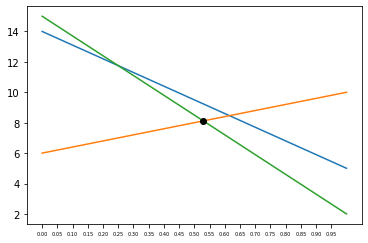

In [105]:
plt.plot([0,1],[14,5])
plt.plot([0,1],[6,10])
plt.plot([0,1],[15,2])
plt.plot(0.53,8.12, 'ko')
plt.xticks(np.arange(0,1,0.05))
plt.tick_params(axis='x', which='major', labelsize=5)

### значение = 8.12, стратегия = 47,53,0

In [101]:
problem = LpProblem('Task 1', LpMinimize)

x1 = LpVariable('x1', lowBound=0)
x2 = LpVariable('x2', lowBound=0)
x3 = LpVariable('x3', lowBound=0)



problem += x1 + x2 + x3

problem += np_data_3[0][0] * x1 + np_data_3[0][1] * x2 >= 1
problem += np_data_3[1][0] * x1 + np_data_3[1][1] * x2 >= 1
problem += np_data_3[2][0] * x1 + np_data_3[2][1] * x2 >= 1

c:\users\irong\desktop\python\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [102]:
problem.solve()
print("x1: ", x1.varValue)
print("x2: ", x2.varValue)
print("x3: ", x3.varValue)
print("Целевая: ", value(problem.objective))

x1:  0.057971014
x2:  0.065217391
x3:  0.0
Целевая:  0.123188405


In [103]:
print("Цена игры: ", round(1/value(problem.objective),2))

Цена игры:  8.12


In [104]:
print('Стратегия 1: ', round((1/value(problem.objective)) * x1.varValue *100), '%')
print('Стратегия 2: ', round((1/value(problem.objective)) * x2.varValue *100), '%')
print('Стратегия 3: ', round((1/value(problem.objective)) * x3.varValue *100), '%')

Стратегия 1:  47 %
Стратегия 2:  53 %
Стратегия 3:  0 %
